# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [8]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axes', 'norm', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [9]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

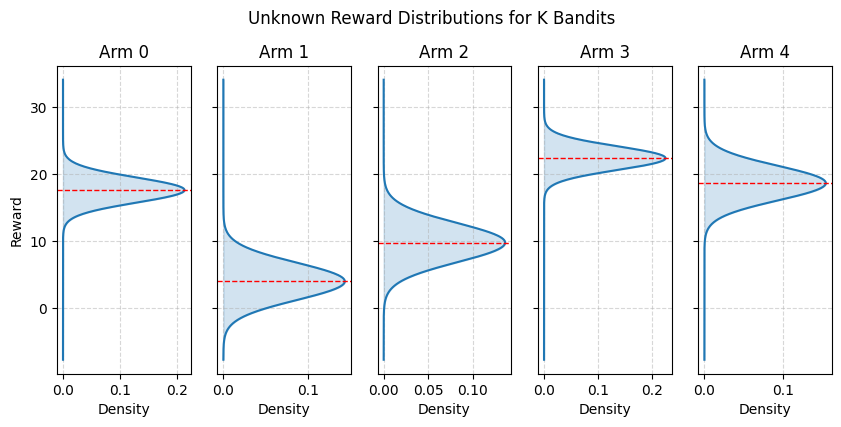

In [10]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

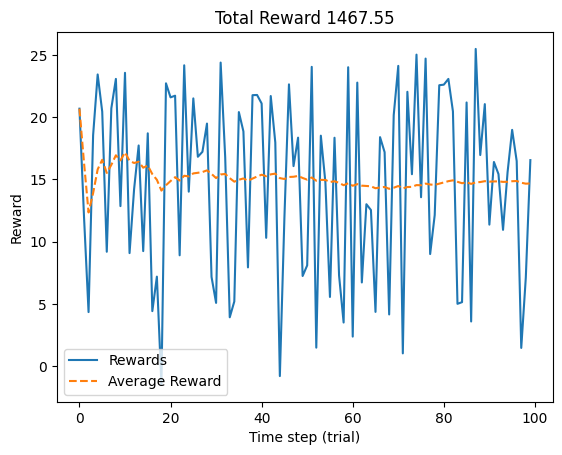

In [11]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

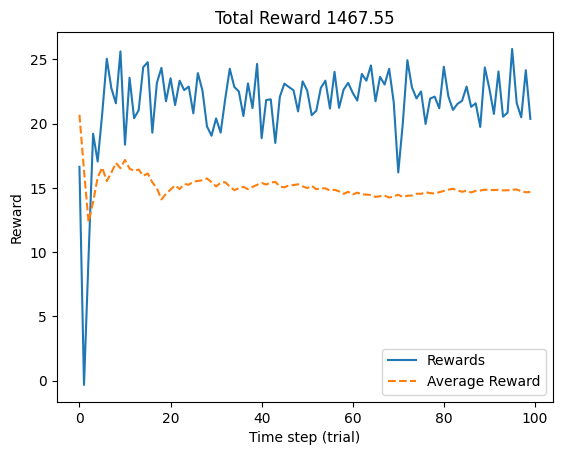

In [12]:
# Rewards
rewards = []

# track totals and counts for each arm
arm_totals = np.zeros(K)
arm_counts = np.zeros(K)

for t in range(T):
  if t < K:
    # try each arm once at the start
    a = t
  else:
    # compute average reward estimates
    avg_estimates = arm_totals / arm_counts
    # pick the arm with highest estimated average reward
    a = np.argmax(avg_estimates)

  # pull arm and get reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

  # update totals and counts
  arm_totals[a] += r
  arm_counts[a] += 1

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



Text(0, 0.5, 'Reward')

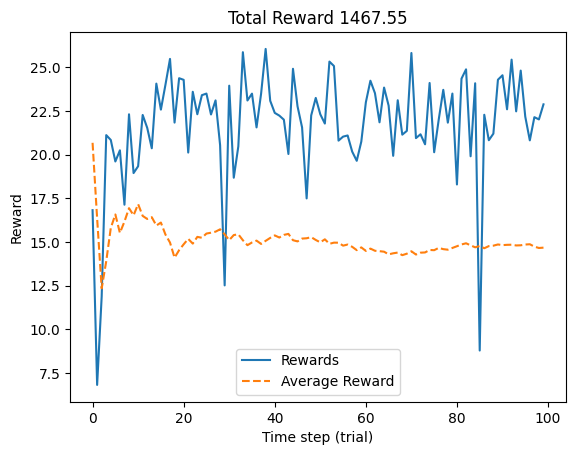

In [13]:
# Rewards
rewards = []

# track totals and counts for each arm
arm_totals = np.zeros(K)
arm_counts = np.zeros(K)

epsilon = 0.1  # 10% of the time, explore

for t in range(T):
  if t < K:
    a = t
  else:
    if np.random.rand() < epsilon:
      # exploration: pick a random arm
      a = np.random.randint(0, K)
    else:
      # Exploitation: pick the best arm so far
      avg_estimates = arm_totals / arm_counts
      a = np.argmax(avg_estimates)

  # pull arm and get reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

  # update totals and counts
  arm_totals[a] += r
  arm_counts[a] += 1

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1. If we use a smaller E like 0.1, it is less likely to get stuck on a bad arm if the
early pulls were unlucky. Whereas if we do 0.001 it almost always goes greedy which can be fine
if it already found the best arm, but it might never see the better option. From this I can see that
a bigger epsilon would be safer because it'll keep checking other arms.
2. I wouldn't say it does, becuase the pure greedy would lock onto whatever arm looks best early on and
won't try anything else. If the rewards change later, it won't adapt. When the environment shifts you would need the
exploration to keep up.
3. Since there's more exploration with a higher epsilon, the agent might take longer to settle
but it won't miss hidden good arms. However the lower epsilon means it mostly exploits and learns fast,
but it could be stuck with a suboptimal arm. In terms of the long run, the best balance would be to explore early
and exploit later on.
4. If there are many more arms, the random exploration wouldn't be worth it because a lot of the pulls would go to bad arms.
Epsilon-greedy still works but it's less efficient. Either you make epsilon smaller or switch to smarter exploration methods that
try not to waste tries on weak arms.